# Correlation Between Social Environments

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

## Parameters 

In [3]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales.csv'
CLIMATE_DATASET = '../Processed_Data/climate_state.csv'
INCOME_DATASET = '../Processed_Data/incomes.csv'
TAX_DATASET = '../Processed_Data/policy_state.csv'
GDP_DATASET = '../Processed_Data/gdp.csv'

# Load Datasets
## Load the EV sales dataset

In [4]:
df_EV = pd.read_csv(EV_SALE_DATASET,index_col=[0])
df_EV = df_EV.set_index("State")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
State,,,,
California,73854,94873,153442,145020
New York,6043,10090,15752,14823
Washington,5363,7068,12650,12172
Florida,6255,6573,13705,15794
Texas,4510,5419,11764,5780


## Load the Climate dataset

In [5]:
df_Climate = pd.read_csv(CLIMATE_DATASET,index_col=[0])
print(df_Climate.shape)
df_Climate.head()

(49, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Massachusetts,49.7,49.6,46.4,47.3,47.7,47.8,47.3,47.4,50.4,49.8,...,51.3,48.8,47.7,48.5,50.3,49.6,49.5,48.5,50.9,50.7
North Carolina,61.1,60.2,58.2,58.7,59.0,58.4,57.8,58.1,60.8,59.7,...,60.7,58.6,58.4,60.5,60.8,61.0,60.4,61.3,60.8,60.2
Arkansas,61.8,61.3,59.9,59.3,60.4,60.5,59.6,59.7,63.1,62.1,...,63.6,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.1,61.2
North Dakota,42.6,42.3,41.2,38.3,40.0,39.6,36.5,40.7,43.2,43.0,...,44.1,38.8,39.0,43.4,44.4,42.0,39.8,38.0,42.3,43.8
Kansas,55.5,55.7,54.2,51.9,54.9,53.9,53.1,53.7,56.3,56.0,...,58.2,53.7,53.7,56.3,57.2,56.5,54.6,53.8,55.6,56.1


## Load the Income dataset

In [6]:
df_Income = pd.read_csv(INCOME_DATASET,index_col=[0])
df_Income = df_Income.set_index("GeoName")
df_Income.index.names = ['State']
print(df_Income.shape)
df_Income.head()

(51, 74)


,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Alabama,10467.9,10252.7,12141.1,13719.4,14571.1,14331.5,16687.0,17907.4,18931.3,20113.4,...,491754.4,790033.1,1185940.7,1629938.5,2175204.7,2680407.0,3251615.6,561796.4,4097666.7,10591485.7
Alaska,0.0,343.4,1834.8,2453.7,2598.4,2486.0,2633.0,2723.0,2688.8,2842.0,...,103757.3,172710.3,231480.8,299836.3,418046.7,593095.3,695672.9,95956.2,807784.7,2192509.1
Arizona,3738.2,3917.6,4731.7,5915.6,6359.8,6732.2,7652.7,8771.7,9488.8,10717.6,...,414098.9,784716.8,1197632.4,1967944.9,2999854.9,3653468.2,4894171.6,569427.7,4364393.0,13481460.5
Arkansas,6429.8,6002.5,6961.9,7638.7,7717.7,7672.4,8583.4,8753.5,9244.4,10108.6,...,280218.7,440516.1,644009.5,916271.4,1254655.3,1612672.7,2048814.3,321698.4,2281015.7,6264201.1
California,73098.0,76086.4,89729.5,104507.7,114912.5,120629.2,136485.1,150933.0,161009.6,179496.7,...,4474919.5,7767454.3,11280953.2,16209227.0,22363039.0,27437210.9,37870143.0,5844770.9,39732554.0,110884678.8


## Load the Tax dataset

In [7]:
df_Tax = pd.read_csv(TAX_DATASET,index_col=[0])
print(df_Tax.shape)
df_Tax.head()

(50, 4)


,Laws and Regulations,State Incentives,Utility/Private Incentives,Total
State,,,,
Alabama,3,2,3,8.0
Alaska,2,0,4,6.0
Arizona,9,5,10,24.0
Arkansas,4,1,1,6.0
California,47,40,46,133.0


## Load the GDP dataset

In [8]:
df_GDP = pd.read_csv(GDP_DATASET,index_col=[0])
df_GDP = df_GDP.set_index("GeoName")
df_GDP.index.names = ['State']
print(df_GDP.shape)
df_GDP.head()

(51, 24)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,,,,,,,,,,,
Alabama,61083.8,64168.6,67225.1,69764.4,72038.4,74152.3,77085.0,81588.9,86356.8,91148.0,...,98890.3,100372.5,102206.9,106036.8,110031.4,112854.1,116653.1,121648.4,126982.8,129730.7
Alaska,12347.8,12889.6,13127.5,13893.0,14883.3,15703.7,16522.0,17454.3,18584.7,19600.3,...,24458.4,25739.1,26362.2,27139.9,27826.3,27170.6,27133.0,28299.9,29108.0,28797.9
Arizona,69876.9,77166.0,82849.8,91205.4,95475.5,98041.6,102681.4,111133.6,121777.9,134607.4,...,139617.8,145243.2,150331.8,156465.4,163929.0,170624.3,180958.5,193037.3,204327.8,214073.1
Arkansas,32715.5,34880.9,36741.0,38766.8,40397.1,41662.0,43485.7,46064.2,48480.3,51110.2,...,56870.0,59196.2,60545.9,62563.9,64679.8,66179.6,68619.4,70996.5,73514.4,75295.1
California,574432.9,625411.7,681068.5,768199.0,786778.9,793668.6,826979.8,881668.6,926929.3,980936.4,...,1059293.2,1113411.5,1157678.6,1225532.5,1313766.3,1371402.0,1452842.6,1531503.1,1615149.1,1658813.1


## Merge into one dataframe

In [9]:
df_correlation = pd.concat([df_Climate[['2016','2017','2018','2019']].mean(axis=1).rename('Temp'),\
                            df_EV[['2016','2017','2018','2019']].mean(axis=1).rename('EV_sale'),\
                            df_Tax['Total'].rename('Tax'),\
                            df_GDP[['2016','2017','2018','2019']].mean(axis=1).rename('GDP'),\
                            df_Income[['2016','2017','2018','2019']].mean(axis=1).rename('Income'),\
                           ], axis = 1)
df_correlation = df_correlation.dropna().sort_index()
print(df_correlation.shape)
df_correlation.head()

(49, 5)


,Temp,EV_sale,Tax,GDP,Income
State,,,,,
Alabama,65.050,646.00,8.0,119534.600,2.167256e+06
Alaska,30.950,119.25,6.0,27927.875,4.506928e+05
Arizona,61.950,4979.50,24.0,187236.975,3.029231e+06
Arkansas,61.925,324.50,6.0,69827.475,1.309460e+06
California,59.725,116797.25,133.0,1492724.200,2.337879e+07


## Visualise the correlations

In [10]:
df_correlation.style.background_gradient(cmap='Blues')

,Temp,EV_sale,Tax,GDP,Income
State,,,,,
Alabama,65.050000,646.000000,8.000000,119534.600000,2167255.925000
Alaska,30.950000,119.250000,6.000000,27927.875000,450692.775000
Arizona,61.950000,4979.500000,24.000000,187236.975000,3029230.600000
Arkansas,61.925000,324.500000,6.000000,69827.475000,1309460.175000
California,59.725000,116797.250000,133.000000,1492724.200000,23378790.950000
Colorado,46.925000,5731.250000,37.000000,200417.975000,3043385.025000
Connecticut,50.825000,2635.000000,28.000000,142608.125000,2822894.050000
Delaware,57.400000,546.750000,12.000000,32602.100000,522977.750000
Florida,72.700000,10581.750000,15.000000,559062.325000,10249916.325000


### Drop California Outlier 

In [11]:
d_drop = df_correlation.drop("California")
d_drop.style.background_gradient(cmap='Blues')

,Temp,EV_sale,Tax,GDP,Income
State,,,,,
Alabama,65.050000,646.000000,8.000000,119534.600000,2167255.925000
Alaska,30.950000,119.250000,6.000000,27927.875000,450692.775000
Arizona,61.950000,4979.500000,24.000000,187236.975000,3029230.600000
Arkansas,61.925000,324.500000,6.000000,69827.475000,1309460.175000
Colorado,46.925000,5731.250000,37.000000,200417.975000,3043385.025000
Connecticut,50.825000,2635.000000,28.000000,142608.125000,2822894.050000
Delaware,57.400000,546.750000,12.000000,32602.100000,522977.750000
Florida,72.700000,10581.750000,15.000000,559062.325000,10249916.325000
Georgia,65.725000,4001.000000,7.000000,309051.350000,4792214.800000


<AxesSubplot:ylabel='State'>

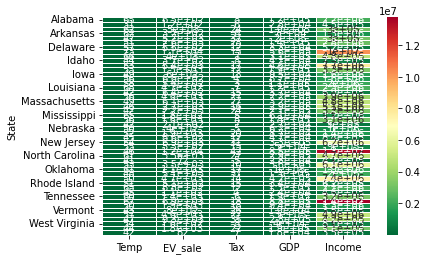

In [12]:
sns.heatmap(d_drop, cmap='RdYlGn_r', linewidths=0.5, annot=True)

### Draw Heatmap

In [20]:
def plot_heatmap(title, df_in,output_path,figsize=(6, 6)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns_heatmap = sns.heatmap(df_corr, square=True, cbar=True, annot=True, cmap=cmap, linewidths=1, vmin=-1)
    ax.set_title(title)
    
    # Save as png image
    fig = sns_heatmap.get_figure()
    fig.savefig(output_path, format='png')

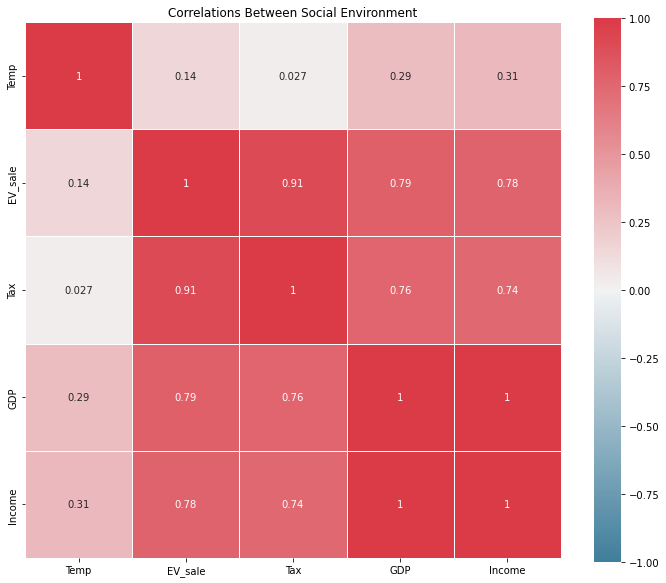

In [21]:
plot_heatmap("Correlations Between Social Environment", df_correlation,output_path='./Images/Correlation_Heatmap.png',figsize=(12,10))

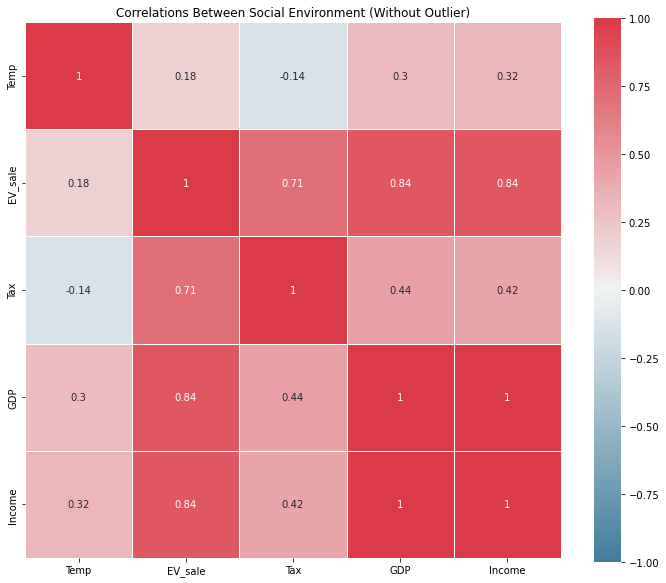

In [22]:
plot_heatmap("Correlations Between Social Environment (Without Outlier)", d_drop,output_path='./Images/Correlation_Heatmap_Without_Outlier.png',figsize=(12,10))

### Draw Scatter Matrix

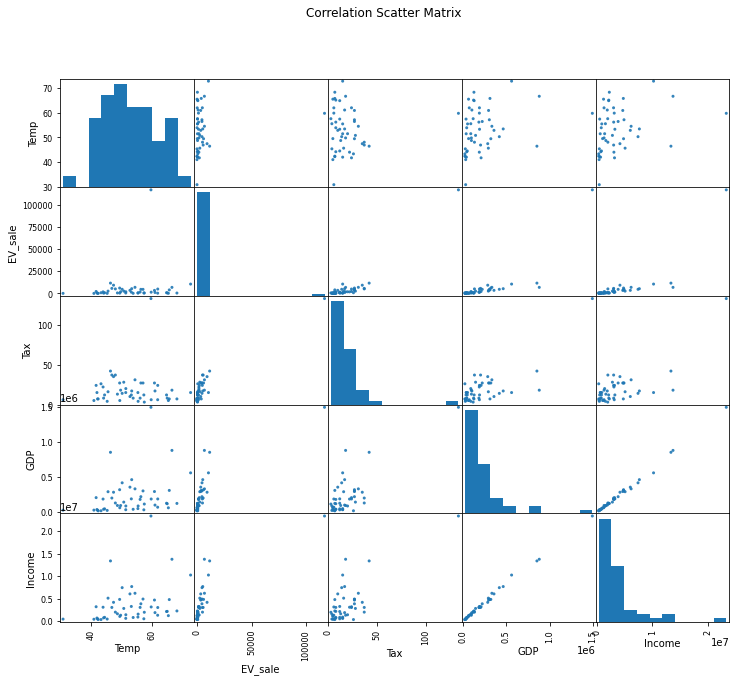

In [35]:
def plot_ScatterMatrix(title, df_in,output_path,figsize=(6, 6)):
    # display the heatmap
    scatter_matrix(df_in, figsize=figsize, alpha=0.9)
    plt.suptitle(title)
    # Save as png image
    plt.savefig(output_path, format='png')
    
plot_ScatterMatrix('Correlation Scatter Matrix',
                   df_correlation,
                   './Images/Correlation_Scatter_Matrix.png',
                   figsize=(12,10)
                  )

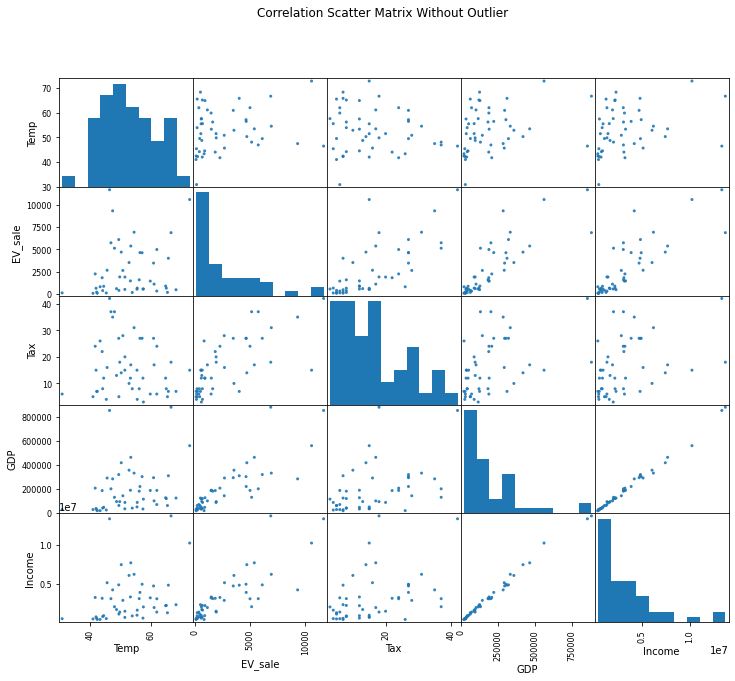

In [37]:
plot_ScatterMatrix('Correlation Scatter Matrix Without Outlier',
                   d_drop,
                   './Images/Correlation_Scatter_Matrix_Without_Outlier.png',
                   figsize=(12,10)
                  )